In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arunjangir245/boston-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\CENTICORE\.cache\kagglehub\datasets\arunjangir245\boston-housing-dataset\versions\2


In [2]:
import pandas as pd
import numpy as np

In [26]:
df3 = pd.read_csv(path+'\\BostonHousing.csv')
df3

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


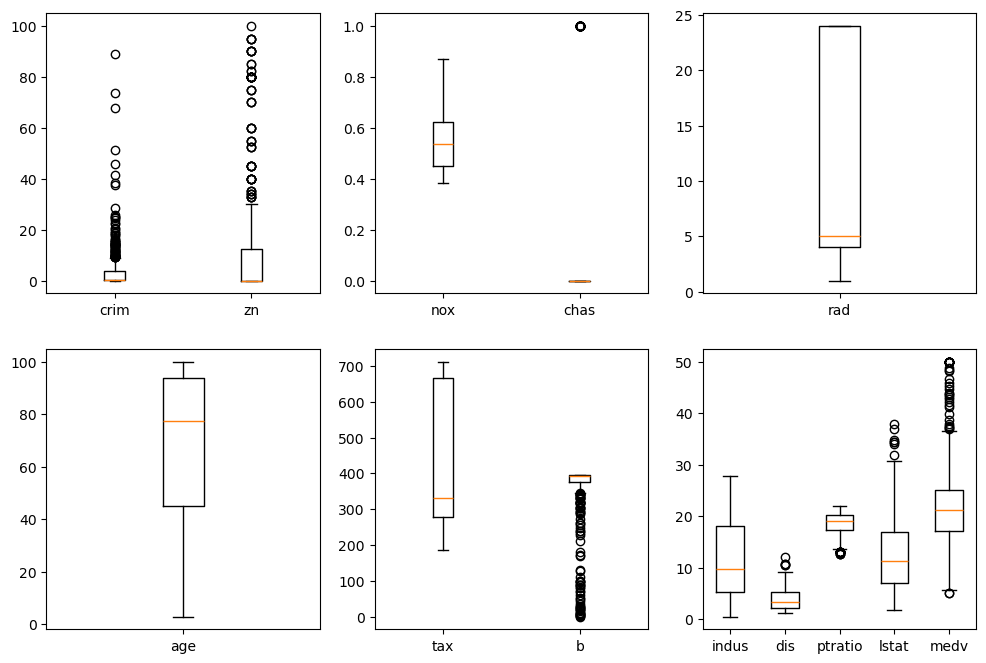

In [29]:
import matplotlib.pyplot as plt

labels1 = ['crim', 'zn']
labels2 = ['nox', 'chas']
labels3 = ['rad']
labels4 = ['age']
labels5 = ['tax', 'b']
labels6 = ['indus', 'dis', 'ptratio', 'lstat', 'medv']

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
#ax.set_ylabel('value')

ax[0, 0].boxplot(df3.loc[:,['crim', 'zn']], tick_labels = labels1)
ax[0, 1].boxplot(df3.loc[:,['nox', 'chas']], tick_labels = labels2)
ax[0, 2].boxplot(df3.loc[:,['rad']], tick_labels = labels3)
ax[1, 0].boxplot(df3.loc[:,['age']], tick_labels = labels4)
ax[1, 1].boxplot(df3.loc[:,['tax', 'b']], tick_labels = labels5)
ax[1, 2].boxplot(df3.loc[:,['indus', 'dis', 'ptratio', 'lstat', 'medv']], tick_labels = labels6)

plt.show()

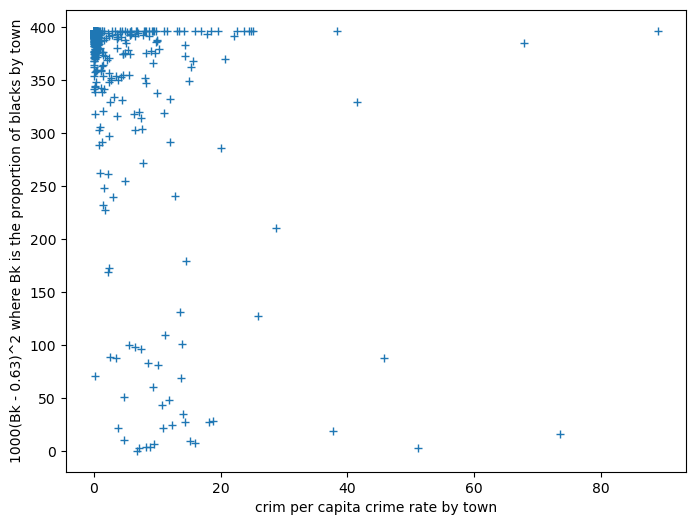

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df3['crim'], df3['b'], '+')
ax.set_ylabel('1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
ax.set_xlabel('crim per capita crime rate by town')
plt.show()

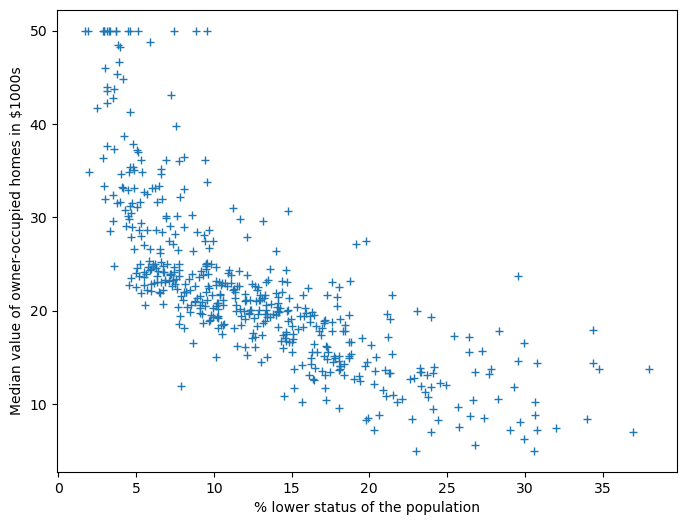

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df3['lstat'], df3['medv'], '+')
ax.set_ylabel('Median value of owner-occupied homes in $1000s')
ax.set_xlabel('% lower status of the population')
plt.show()

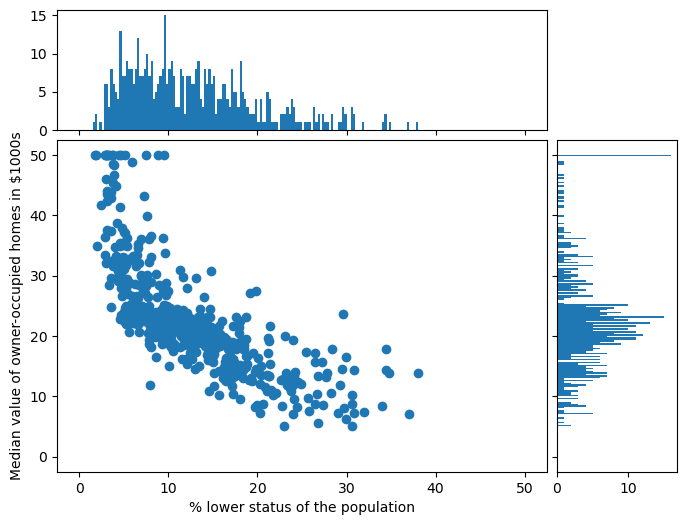

In [63]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(8, 6))

x = df3['lstat']
y = df3['medv']

# the scatter plot:
ax.scatter(x, y)
ax.set_ylabel('Median value of owner-occupied homes in $1000s')
ax.set_xlabel('% lower status of the population')

# create new Axes on the right and on the top of the current Axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(0, lim, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

plt.show()

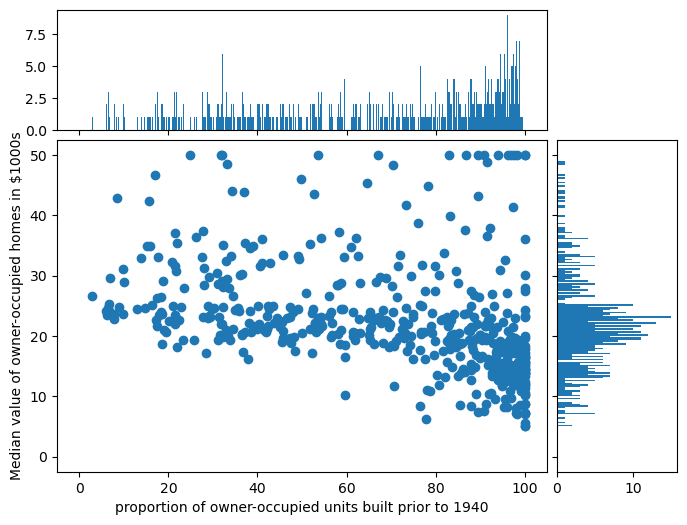

In [68]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(8, 6))

x = df3['age']
y = df3['medv']

# the scatter plot:
ax.scatter(x, y)
ax.set_ylabel('Median value of owner-occupied homes in $1000s')
ax.set_xlabel('proportion of owner-occupied units built prior to 1940')

# create new Axes on the right and on the top of the current Axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))

binx = np.arange(0, xmax, binwidth)
biny = np.arange(0, ymax, binwidth)
ax_histx.hist(x, bins=binx)
ax_histy.hist(y, bins=biny, orientation='horizontal')

plt.show()